- ### Documents used : 
    - https://www.datacamp.com/tutorial/random-forests-classifier-python
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [7]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np

from ML_loader import DatasetLoader,ModelLoader

In [8]:
#Get data 
loader = DatasetLoader()
loader.read_dataset('partial_database.csv',class_path='labelsDefault.txt',separator=',')
loader.split_dataset()

#Normalize data, if not already normalized
print(np.shape(loader.X_train),np.shape(loader.X_test),np.shape(loader.y_train),np.shape(loader.y_test))

(4048, 17) (1012, 17) (4048,) (1012,)


score:  0.7065217391304348
memory:  296.0920138888889


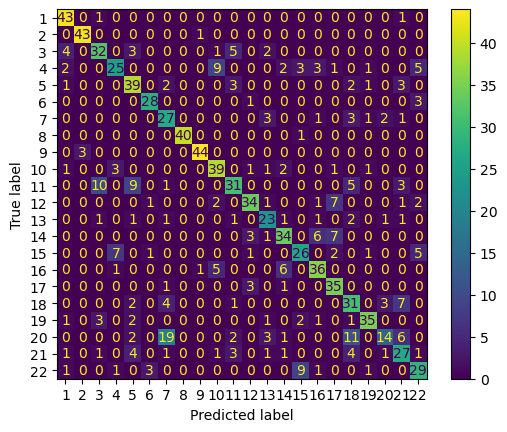

In [9]:
#Get model
model = ModelLoader()
model.set_model(RandomForestClassifier())

cv = RepeatedStratifiedKFold(n_splits=22, n_repeats=3, random_state=1)

#Optimization 
"""
param  = {'n_estimators': np.random.randint(1000,1100,20),
              'max_depth': np.random.randint(30,40,10)}

model.set_optimal_params(param)

model.optimize(loader.X_train,loader.y_train,cv=cv,scoring='accuracy',n_iter=10)
"""
#Opti parameters {'max_depth': 36, 'n_estimators': 1004}

#Train model with optimal params
model.set_model(RandomForestClassifier(max_depth=36,n_estimators=1004))
mem,res=model.fit_train(loader.X_train,loader.y_train)

#Score
print("score: ",model.score(loader.X_test,loader.y_test))
print("memory: ",np.mean(mem))
cm=confusion_matrix(loader.y_test,model.predict(loader.X_test))
ConfusionMatrixDisplay(cm,display_labels=loader.classes).plot()